In [1]:
print("Lecture-9")

Lecture-9


pima-indians-diabetes: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database


1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1)


Amacımız yapay sinir ağlarını kullanarak yeni bir kişinin bu sekiz öezlliğine bakara onun belli güvenilirlikle şeker hastası olup olmadğını kestirmektedir.

In [2]:
import pandas as pd

training_ratio = 0.8
df = pd.read_csv('diabetes.csv')
dataset = df.to_numpy()
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [3]:
import numpy as np

np.random.shuffle(dataset)

training_zone = int(len(dataset) * training_ratio)

training_dataset = dataset[:training_zone, :]
test_dataset = dataset[training_zone:, :]

training_dataset_x = training_dataset[:, :-1]
training_dataset_y = training_dataset[:, -1]

test_dataset_x = test_dataset[:, :-1]
test_dataset_y = test_dataset[:, -1]

In [5]:
test_dataset

array([[8.00e+00, 1.00e+02, 7.60e+01, ..., 1.90e-01, 4.20e+01, 0.00e+00],
       [5.00e+00, 1.09e+02, 7.50e+01, ..., 5.46e-01, 6.00e+01, 0.00e+00],
       [7.00e+00, 1.36e+02, 9.00e+01, ..., 2.10e-01, 5.00e+01, 0.00e+00],
       ...,
       [4.00e+00, 9.50e+01, 6.00e+01, ..., 2.84e-01, 2.80e+01, 0.00e+00],
       [2.00e+00, 1.44e+02, 5.80e+01, ..., 4.22e-01, 2.50e+01, 1.00e+00],
       [2.00e+00, 9.20e+01, 5.20e+01, ..., 1.41e-01, 2.20e+01, 0.00e+00]])

Yukarıdaki manuel biçimde yaptığımız işlem scikit_learn kütüphanesindeki train_test_split fonksiyonuyla tek hamlede de yapılabilmektedir. sklearn.model_selection --> train_test_split

`sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None,
random_state=None, shuffle=True, stratify=None)`


In [6]:
import pandas as pd

df = pd.read_csv('diabetes.csv')

dataset_x = df.iloc[:, :-1]
dataset_y = df.iloc[:, -1]

dataset_x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [7]:
dataset_y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

training_dataset_x, test_dataset_x, training_dataset_y,  test_dataset_y = train_test_split(dataset_x, dataset_y, test_size=0.2)

In [10]:
training_dataset_x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
598,1,173,74,0,0,36.8,0.088,38
48,7,103,66,32,0,39.1,0.344,31
720,4,83,86,19,0,29.3,0.317,34
529,0,111,65,0,0,24.6,0.660,31
724,1,111,94,0,0,32.8,0.265,45
...,...,...,...,...,...,...,...,...
678,3,121,52,0,0,36.0,0.127,25
445,0,180,78,63,14,59.4,2.420,25
147,2,106,64,35,119,30.5,1.400,34
394,4,158,78,0,0,32.9,0.803,31


In [11]:
test_dataset_x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
463,5,88,78,30,0,27.6,0.258,37
671,1,99,58,10,0,25.4,0.551,21
313,3,113,50,10,85,29.5,0.626,25
362,5,103,108,37,0,39.2,0.305,65
592,3,132,80,0,0,34.4,0.402,44
...,...,...,...,...,...,...,...,...
559,11,85,74,0,0,30.1,0.300,35
458,10,148,84,48,237,37.6,1.001,51
178,5,143,78,0,0,45.0,0.190,47
44,7,159,64,0,0,27.4,0.294,40


In [12]:
training_dataset_y

598    1
48     1
720    0
529    0
724    0
      ..
678    1
445    1
147    0
394    1
527    0
Name: Outcome, Length: 614, dtype: int64

### Keras'ta Yapay Sinir Ağlarının Oluşturulması

Uygulamacının kabaca ağ için şu belirlemeleri yapmış olması gerekir.

- Ağdaki katmanların sayısı ve katmanların bağlantı biçimleri
- Katmanlardaki nöronların sayısı
- Katman nöronlarında kullanılacak olan aktivasyon (transfer) fonksiyonları
- Eğitim ve test sürecinde kullanılacak girdi ve çıktı veri kümeleri
- Sistemin amaçlarına yaklaştığını ölçmek için kullanılacak "amaç fonksiyonu (loss function)"
- w ve bias değerlerinin iyileştirme yöntemini belirleyen optimizasyon algoritması 

Keras'ta işlemler tipik olarak beş aşamadan geçilerek gerçekleştirilebilir:

1) Modelin Oluşturulması: Keras'ta yapay sinir ağı modelleri sınıflarla temsil edilmektedir. En yaygın kullanılan model sınıfı Sequential isimli sınıftır. Model sınıfından türetilmiştir. 

from tensorflow.keras.models import Sequential

model = Sequential()
model = Sequential(name = 'Diabetes')

Keras'ta Sequential dışında başka model sınıfları da vardır. İlerede bakacağız.

2) Modele katmanların Eklenmesi: Katman ekleme işlemi Sequential sınıfının add metodu kullanılmaktadır. add metodu bizden argüman olarak eklenecek katman nesnesini alır ve katmanı modelin sonuna ekler. Keras'ta çeşitli katman sınıfları vardır. En çok kullanılanı Dense isimli katmandır. Dense katmanı (dense yoğun anlamına geliyor) "önceki katmanın her nöronunun eklenecek olan katmanın her nöronu ile bağlanacağı" anlamına gelmektedir. Örneğin, önceki katmanın Üç nöronu olduğunu düşünelim ve üç nöronlu bir dense katman ekleyecek olalım.

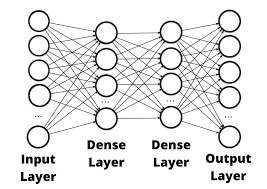

tensorflow.keras.layers.Dense(units,
 activation=None,
 use_bias=True,
 kernel_initializer='glorot_uniform',
 bias_initializer='zeros',
 kernel_regularizer=None,
 bias_regularizer=None,
 activity_regularizer=None,
 kernel_constraint=None,
 bias_constraint=None,
 **kwargs
) 

Units: eklenecek katmandaki nöron sayısı, 
Activation: o katmandki tüm nöronların aktivasyon fonksiyonu. (tensorflow.keras.activations)
use_bias: katmandaki nöronlarda "bias" değerinin kullanılıp kullanılmayacağını belirtmektedir. 
kernel_initializer: başlangıçtaki "w" değerlerinni dağılımını belirtmektedir. Yani biz işin başında bu "w" değerlerini rastgele biçimde belli bir dağılıma göre oluşturabilirz. Bu parametre "glorot_uniform" biçiminde default değer almaktadır. "Glorot uniform" dağılımı ("Xavier initialization") bir çeşit sürekli düzgün dağılımdır. --> ÖDEV

Dense sınıfının input_dim ya da input_shape isimli özel parametreleri girdi katmanındaki nöron sayılarını belirtmek için kullanılmaktadır. Keras'ta katmanı katman nesneleriyle yaratılmamaktadır. Girdi katmanındaki nöron sayıları ağa eklenen ilk katmanda input_dim ya da input_shape parametreleri yoluyla belirlenmektedir. iki parametre arasındaki tek fark input_dim parametresinin tek boyutlu girdiyi belirtmek için input_shape parametresinin çok boyutlu girdiyi belirtmek için kullanılmasıdır.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(16, input_dim=8, activation='relu', name='Hidden-1')) -> burada 16 nöronlu bir saklı katman oluşturduk.
=
model.add(Dense(16, input_shape=(8, ), activation='relu', name='Hidden-1'))

Burada saklı katmanın transfer fonksiyonu "relu (rectifier linear unit)" olarak alınmıştır. Pek çok problem türü için saklı katmanlarda en fazla kullanılan transfer (aktivasyon) fonksiyonudur. Bu fonksiyon negatif x değerleri için 0, pozitif x değerleri için x değerini veren basit bir fonksiyonudr:

f(x) = maximum(0, x)

ya da fonksiyon nesneleri biçiminde aktivasyon fonksiyonunu belirtebiliriz.

from tensorflow.keras.activations import relu

model.add(Dense(15, input_dim=8, activation=relu, name='Hidden-1')) -> birinci saklı katman
model.add(Dense(16, activation=relu, name='Hidden-1')) -> ikinci saklı katman
model.add(Dense(1, activation=sigmoid, name='Hidden-1')) --> output

böylece ağımızda 4 katman oluşturmuş olduk: 1 tane girdi katmanı, 2 tane saklı katman ve 1 tane de çıktı katmanı.



Ağın çıktı katmanı için özel bir belirleme yapılmamaktadır. Her zaman son katman zaten çıktı katmanı olmaktadır. Dense modelinde çıktı katmanının aktivasyon fonksiyonu "sigmoid" olarak kullanışmıtr. Sigmoid fonksiyonu iki sınıflı lojistik regresyon modellerinde çıktı katmanında en fazla tercih edilen aktivasyon fonksiyonudur:

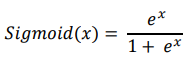

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('diabetes.csv')

dataset_x = dataset.iloc[:, :-1]
dataset_y = dataset.iloc[:, -1]

training_dataset_x, test_dataset_x, training_dataset_y, test_dataset_y = train_test_split(dataset_x, dataset_y, test_size=0.2)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(64, input_dim=8, activation='relu', name='Hidden-1'))
model.add(Dense(64, activation='relu', name='Hidden-2'))
model.add(Dense(1, activation='sigmoid', name='Output'))

In [22]:
dataset_x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


3) Modelin Derlenmesi: Modele katmanlar eklendikten sonra artık modelin derlenmesi gerekir. Derleme terimi bir çeşit konfigüre etmek anlamında kullanılmaktadır. 

Dense.compile(optimizer='rmsprop',
 loss=None,
 metrics=None,
 loss_weights=None,
 weighted_metrics=None,
 run_eagerly=None,
 steps_per_execution=None,
 **kwargs
) 

Optimizer, loss, metrics.

#### __LOSS__

Yapay sinir ağları eğitilirken veri kümesinin her bir ele alınması işleminden sonra (buna "epoch" denilmektedir) gerçek değerlerle modelden elde edilen değerler arasındaki fark bir fonksiyonla hesaplanmaktadır. İşte gerçek değerlerle modelden elde edilen değerlerin arasındaki farkı hesaplamak için kullanılan fonksiyonlara "loss fonksiyonları" denilmektedir. Örneğin bir regresyon modelinde olması gereken çıktı değeri 172 iken ağımızın bunu 182 olarak bulduğunu varsayalım. Burda bir fark vardır. Ağın eğitilmesi gerçek değerlerle
ağın bulduğu değerlerin minimize edilmeye çalışmasıyla yapılmaktadr. Bu bağlamda işlevinden dolayı loss fonksiyonuna "amaç fonksiyonu" da diyebiliriz. Loss fonksiyonları problemin türüne göre seçilmektedir. Lojistik olmayan regresyon tarzı problemlerle lojistik regresyon problemlerinde kullanılabilecek loss fonksiyonları farkldır.

Yapay sinir ağlarında en çok kullanılan loss fonksiyonları şunlardır: MSE (mean squared error), "MAE (Mean absolute error)", "MAPE (mean absolute percentage error)", "MSLE", "binary cross-entropy", "categorical-cross entropy". İkili sınıflandırma problemleri için en çok kullanılan loss fonksiyonu "binary cross-entropy" fonksiyonudur. Bu nedenle bu veri kümesinde loss fonksiyonu olarak bu fonksiyonu kullanacağız.

model.compile(loss = 'binary_crossentropy', ...)

loss fonksiyonları --> tensorflow.keras.losses

## __OPTIMIZER__

Compile metodunun optimizer parametresi

